data source: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import numpy as np
import pandas as pd
import datetime

In [25]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [10]:
byDate = df.groupby([df['date_added'].dt.date, "type"])["show_id"].count().reset_index()
byDate

date_added     type  show_id
0     2008-01-01    Movie        1
1     2008-02-04  TV Show        1
2     2009-05-05    Movie        1
3     2009-11-18    Movie        1
4     2010-11-01    Movie        1
...          ...      ...      ...
2540  2021-09-23    Movie        1
2541  2021-09-23  TV Show        1
2542  2021-09-24    Movie        3
2543  2021-09-24  TV Show        7
2544  2021-09-25    Movie        1

[2545 rows x 3 columns]

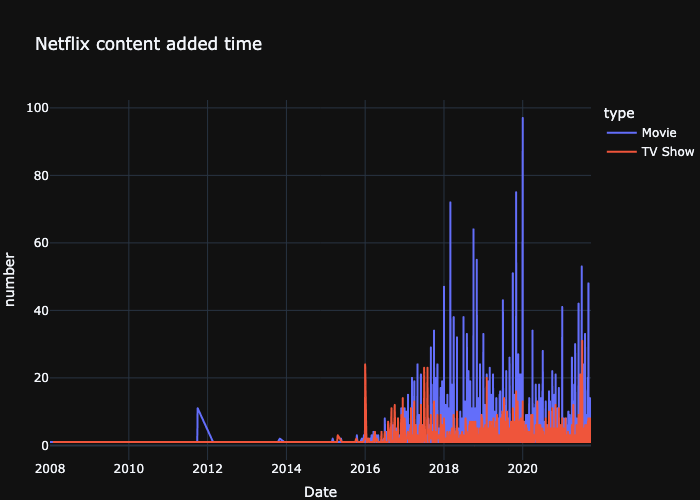

In [38]:
fig = px.line(byDate, x='date_added', y='show_id', color = "type",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix content added time')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [17]:
byMonth = df.groupby([df['date_added'].dt.to_period('M'), "type"])["show_id"].count().reset_index()
byMonth["date_added"] = byMonth["date_added"].astype("string")
byMonth

date_added     type  show_id
0      2008-01    Movie        1
1      2008-02  TV Show        1
2      2009-05    Movie        1
3      2009-11    Movie        1
4      2010-11    Movie        1
..         ...      ...      ...
188    2021-07  TV Show       88
189    2021-08    Movie      117
190    2021-08  TV Show       61
191    2021-09    Movie      118
192    2021-09  TV Show       65

[193 rows x 3 columns]

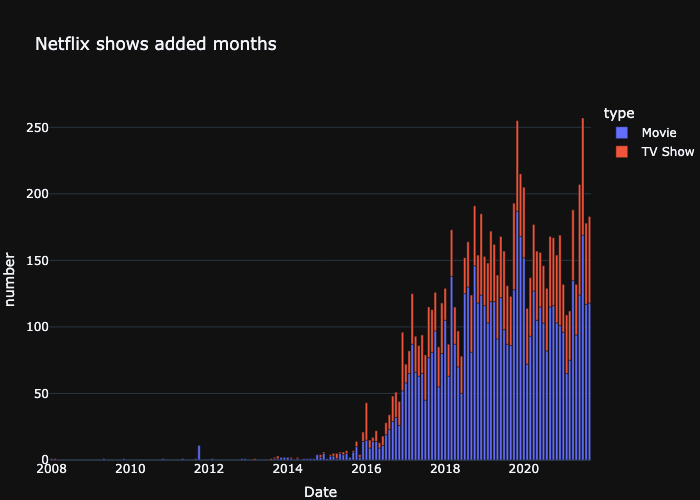

In [37]:
fig = px.bar(byMonth, x='date_added', y='show_id', color = "type",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix shows added months')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [22]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
byYear = df.groupby([df['date_added'].dt.year, "rating"])["show_id"].count().reset_index()
byYear

date_added rating  show_id
0        2008.0  TV-MA        2
1        2009.0  TV-MA        2
2        2010.0     NR        1
3        2011.0  TV-14        5
4        2011.0  TV-MA        3
..          ...    ...      ...
104      2021.0   TV-G       44
105      2021.0  TV-MA      489
106      2021.0  TV-PG       97
107      2021.0   TV-Y       57
108      2021.0  TV-Y7       87

[109 rows x 3 columns]

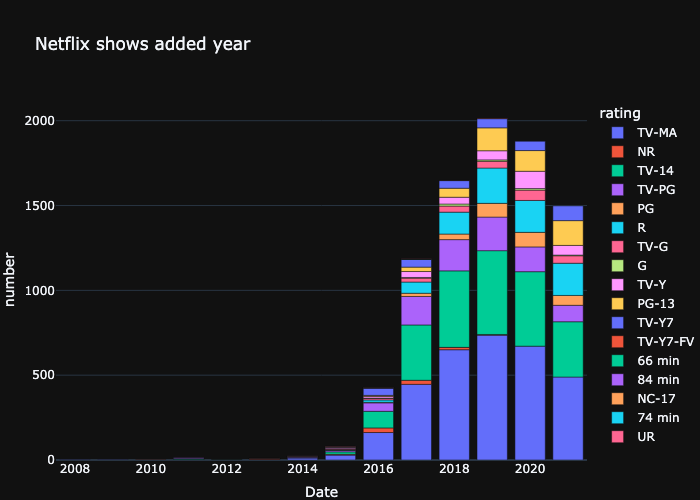

In [36]:
fig = px.bar(byYear, x='date_added', y='show_id', color = "rating",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix shows added year')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

- TV-MA: content for mature audiences, equivalent to the MPAA film ratings R and NC-17.
- TV-14: content with parents strongly cautioned, equivalent to the MPAA film rating PG-13. 

In [39]:
df["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [42]:
df_min = df[df["duration"].str.contains("min") & df["duration"].notnull()]
df_min

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country date_added  \
0                                         United States 2021-09-25   
6                                                   NaN 2021-09-24   
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
6     Equestria's divided. But 

In [62]:
df[df["type"] == "Movie"].count()

show_id         6131
type            6131
title           6131
director        5943
cast            5656
country         5691
date_added      6131
release_year    6131
rating          6129
duration        6128
listed_in       6131
description     6131
dtype: int64

In [47]:
df_min["duration"] = df_min["duration"].str.replace(" min", "")
df_min["duration"] = df_min["duration"].astype("int")

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_37538/4200300278.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_37538/4200300278.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df_min["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

In [51]:
byDuration = df_min.sort_values(by = "duration", ascending = True).groupby(["duration"])["show_id"].count().reset_index()
byDuration

duration  show_id
0           3        1
1           5        1
2           8        1
3           9        1
4          10        1
..        ...      ...
200       233        1
201       237        1
202       253        1
203       273        1
204       312        1

[205 rows x 2 columns]

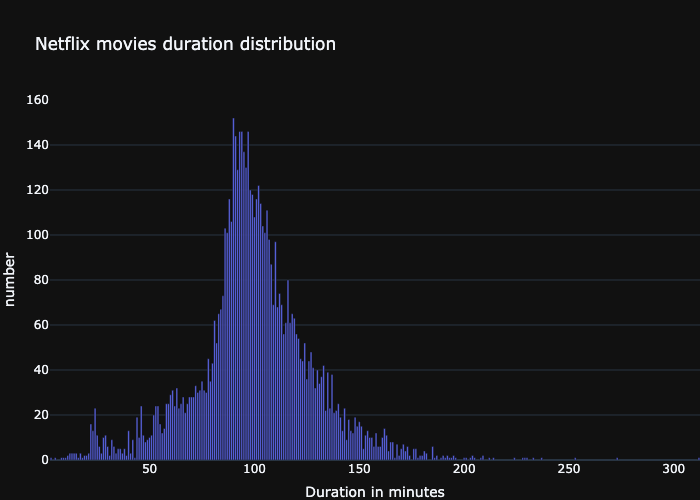

In [54]:
fig = px.bar(byDuration, x='duration', y='show_id',
             labels={'duration':'Duration in minutes', 'show_id':'number'}, 
             title='Netflix movies duration distribution')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [63]:
df_season = df[df["duration"].str.contains("Seasons") & df["duration"].notnull()]
df_season

show_id     type                          title         director  \
1         s2  TV Show                  Blood & Water              NaN   
4         s5  TV Show                   Kota Factory              NaN   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
15       s16  TV Show              Dear White People              NaN   
17       s18  TV Show                Falsa identidad              NaN   
...      ...      ...                            ...              ...   
8755   s8756  TV Show              Women Behind Bars              NaN   
8795   s8796  TV Show                Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show                     Yunus Emre              NaN   
8797   s8798  TV Show                      Zak Storm              NaN   
8803   s8804  TV Show                    Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
15    Logan Browning, Brandon P. Bell, DeRon Horton,...   
17    Luis Ernesto Franco, Camila Sodi, Sergio Goyri...   
...                                                 ...   
8755                                                NaN   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8803                                                NaN   

                                            country date_added  release_year  \
1                                      South Africa 2021-09-24          2021   
4                                             India 2021-09-24          2021   
8                                    United Kingdom 2021-09-24          2021   
15                                    United States 2021-09-22          2021   
17                                           Mexico 2021-09-22          2020   
...                                             ...        ...           ...   
8755                                  United States 2016-11-01          2010   
8795                                  Japan, Canada 2018-05-01          2015   
8796                                         Turkey 2017-01-17          2016   
8797  United States, France, South Korea, Indonesia 2018-09-13          2016   
8803                                            NaN 2019-07-01          2018   

     rating   duration                                          listed_in  \
1     TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
4     TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
8     TV-14  9 Seasons                       British TV Shows, Reality TV   
15    TV-MA  4 Seasons                             TV Comedies, TV Dramas   
17    TV-MA  2 Seasons  Crime TV Shows, Spanish-Language TV Shows, TV ...   
...     ...        ...                                                ...   
8755  TV-14  3 Seasons                         Crime TV Shows, Docuseries   
8795  TV-Y7  2 Seasons                             Anime Series, Kids' TV   
8796  TV-PG  2 Seasons                  International TV Shows, TV Dramas   
8797  TV-Y7  3 Seasons                                           Kids' TV   
8803  TV-Y7  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
4     In a city of coaching centers known to train I...  
8     A talented batch of amateur bakers face off in...  
15    Students of color navigate the daily slights a...  
17    Strangers Diego and Isabel flee their home in ...  
...                                                 ...  
8755  This reality series recounts true stories of w...  
8795  Now that he's discovered the Pendulum Summonin...  
8796  Durin

In [64]:
df_season["duration"] = df_season["duration"].str.replace(" Seasons", "")
df_season["duration"] = df_season["duration"].str.replace(" Season", "")
df_season["duration"] = df_season["duration"].astype("int")
df_season

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_37538/3167691429.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_37538/3167691429.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_37538/3167691429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

show_id     type                          title         director  \
1         s2  TV Show                  Blood & Water              NaN   
4         s5  TV Show                   Kota Factory              NaN   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
15       s16  TV Show              Dear White People              NaN   
17       s18  TV Show                Falsa identidad              NaN   
...      ...      ...                            ...              ...   
8755   s8756  TV Show              Women Behind Bars              NaN   
8795   s8796  TV Show                Yu-Gi-Oh! Arc-V              NaN   
8796   s8797  TV Show                     Yunus Emre              NaN   
8797   s8798  TV Show                      Zak Storm              NaN   
8803   s8804  TV Show                    Zombie Dumb              NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
15    Logan Browning, Brandon P. Bell, DeRon Horton,...   
17    Luis Ernesto Franco, Camila Sodi, Sergio Goyri...   
...                                                 ...   
8755                                                NaN   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8803                                                NaN   

                                            country date_added  release_year  \
1                                      South Africa 2021-09-24          2021   
4                                             India 2021-09-24          2021   
8                                    United Kingdom 2021-09-24          2021   
15                                    United States 2021-09-22          2021   
17                                           Mexico 2021-09-22          2020   
...                                             ...        ...           ...   
8755                                  United States 2016-11-01          2010   
8795                                  Japan, Canada 2018-05-01          2015   
8796                                         Turkey 2017-01-17          2016   
8797  United States, France, South Korea, Indonesia 2018-09-13          2016   
8803                                            NaN 2019-07-01          2018   

     rating  duration                                          listed_in  \
1     TV-MA         2    International TV Shows, TV Dramas, TV Mysteries   
4     TV-MA         2  International TV Shows, Romantic TV Shows, TV ...   
8     TV-14         9                       British TV Shows, Reality TV   
15    TV-MA         4                             TV Comedies, TV Dramas   
17    TV-MA         2  Crime TV Shows, Spanish-Language TV Shows, TV ...   
...     ...       ...                                                ...   
8755  TV-14         3                         Crime TV Shows, Docuseries   
8795  TV-Y7         2                             Anime Series, Kids' TV   
8796  TV-PG         2                  International TV Shows, TV Dramas   
8797  TV-Y7         3                                           Kids' TV   
8803  TV-Y7         2             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
4     In a city of coaching centers known to train I...  
8     A talented batch of amateur bakers face off in...  
15    Students of color navigate the daily slights a...  
17    Strangers Diego and Isabel flee their home in ...  
...                                                 ...  
8755  This reality series recounts true stories of w...  
8795  Now that he's discovered the Pendulum Summonin...  
8796  During the Mongol

In [65]:
bySeason = df_season.sort_values(by = "duration", ascending = True).groupby(["duration"])["show_id"].count().reset_index()
bySeason

duration  show_id
0          2      425
1          3      199
2          4       95
3          5       65
4          6       33
5          7       23
6          8       17
7          9        9
8         10        7
9         11        2
10        12        2
11        13        3
12        15        2
13        17        1

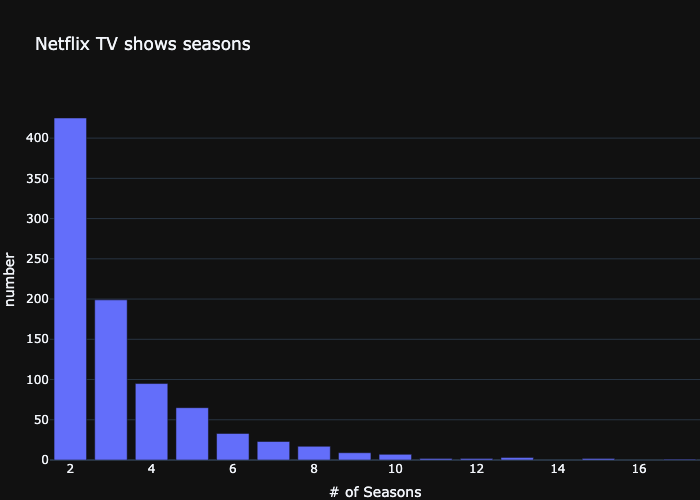

In [66]:
fig = px.bar(bySeason, x='duration', y='show_id',
             labels={'duration':'# of Seasons', 'show_id':'number'}, 
             title='Netflix TV shows seasons')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")